In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [ ]:
datos = pd.read_csv("data/usuarios_win_mac_lin.csv")

In [ ]:
X = datos[["duracion", "paginas", "acciones", "valor"]]
y = datos["clase"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 127
Tamaño del conjunto de prueba: 43


In [ ]:
print("MODELO 1: ÁRBOL DE DECISIÓN")

tree_basic = DecisionTreeClassifier(
    random_state=42
)

tree_basic.fit(X_train, y_train)
y_pred_basic = tree_basic.predict(X_test)

accuracy_basic = accuracy_score(y_test, y_pred_basic)
print(f"Accuracy: {accuracy_basic:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_basic))

MODELO 1: ÁRBOL DE DECISIÓN
Accuracy: 0.6744
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.68        22
           1       0.71      0.50      0.59        10
           2       0.59      0.91      0.71        11

    accuracy                           0.67        43
   macro avg       0.68      0.68      0.66        43
weighted avg       0.69      0.67      0.67        43



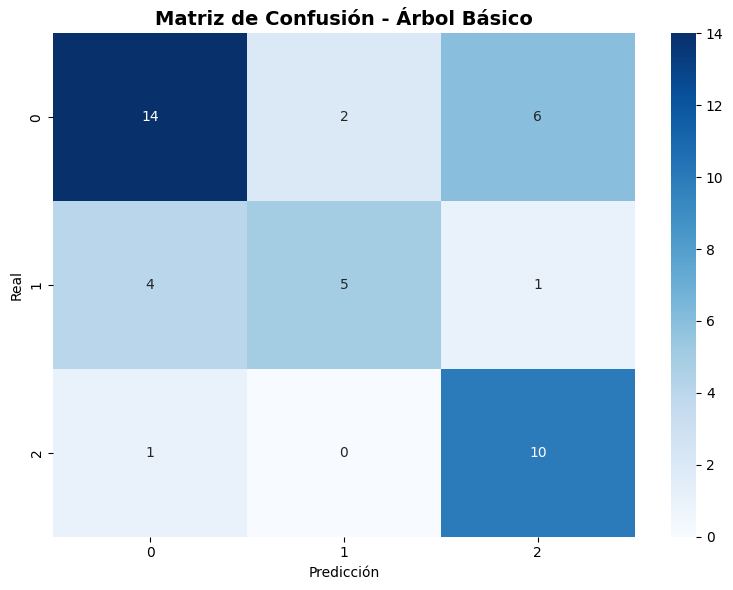

In [ ]:
cm_basic = confusion_matrix(y_test, y_pred_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión - Árbol Básico", fontsize=14, fontweight='bold')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [ ]:
print("MODELO 2: OPTIMIZACIÓN CON GRIDSEARCH (Árbol de Desisiones)")
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 8, 12, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="accuracy",
    verbose=1
)

grid_tree.fit(X_train, y_train)

MODELO 2: OPTIMIZACIÓN CON GRIDSEARCH (Árbol de Desisiones)
Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [ ]:
print("Mejores Hiperparametros")
print(grid_tree.best_params_)
print(f"Mejor score CV: {grid_tree.best_score_:.4f}")

Mejores Hiperparametros
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score CV: 0.7006


In [ ]:
best_tree = grid_tree.best_estimator_
y_pred_best = best_tree.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("RESULTADOS DEL MODELO OPTIMIZADO")
print(f"Accuracy: {accuracy_best:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

RESULTADOS DEL MODELO OPTIMIZADO
Accuracy: 0.6977
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.71        22
           1       0.71      0.50      0.59        10
           2       0.62      0.91      0.74        11

    accuracy                           0.70        43
   macro avg       0.70      0.70      0.68        43
weighted avg       0.71      0.70      0.69        43



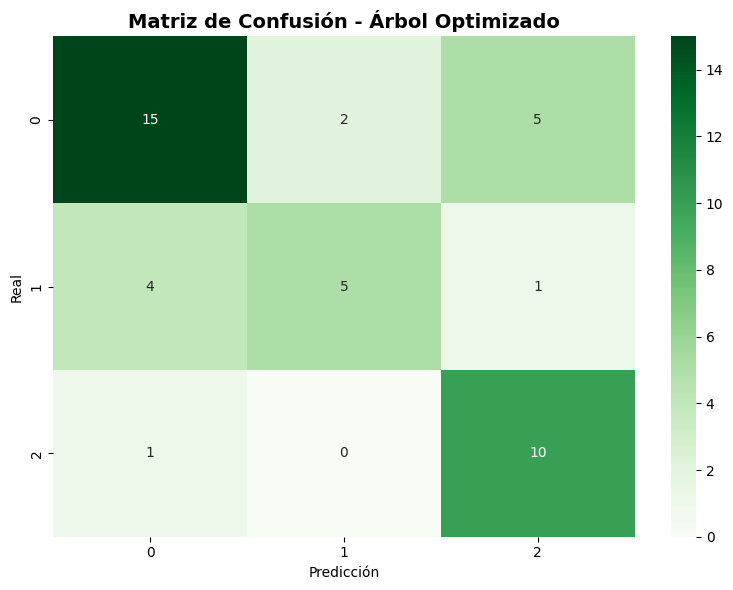

In [ ]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap="Greens",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matriz de Confusión - Árbol Optimizado", fontsize=14, fontweight='bold')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [ ]:
print("COMPARACIÓN DE MODELOS")

comparacion = pd.DataFrame({
    'Modelo': ['Árbol Básico', 'Árbol Optimizado'],
    'Accuracy': [accuracy_basic, accuracy_best]
})

print(comparacion.to_string(index=False))

COMPARACIÓN DE MODELOS
          Modelo  Accuracy
    Árbol Básico  0.674419
Árbol Optimizado  0.697674


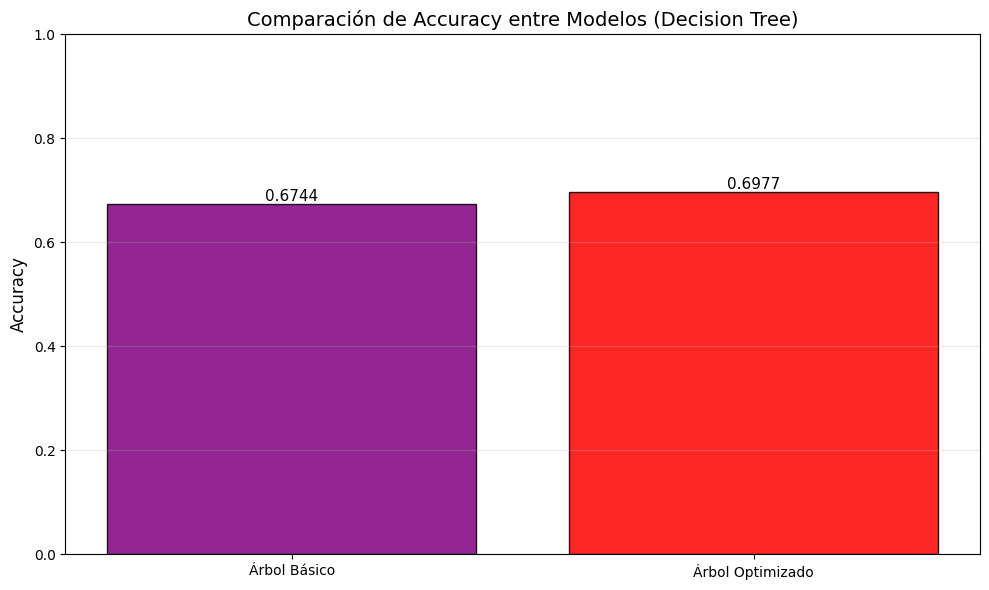

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(comparacion['Modelo'], comparacion['Accuracy'],
               color=['purple', 'red'], alpha=0.85, edgecolor='black')
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparación de Accuracy entre Modelos (Decision Tree)', fontsize=14)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
print(f"Accuracy modelo básico: {accuracy_basic:.4f}")
print(f"Accuracy modelo optimizado: {accuracy_best:.4f}")
print(f"Mejora absoluta: {(accuracy_best - accuracy_basic):.4f}")

Accuracy modelo básico: 0.6744
Accuracy modelo optimizado: 0.6977
Mejora absoluta: 0.0233


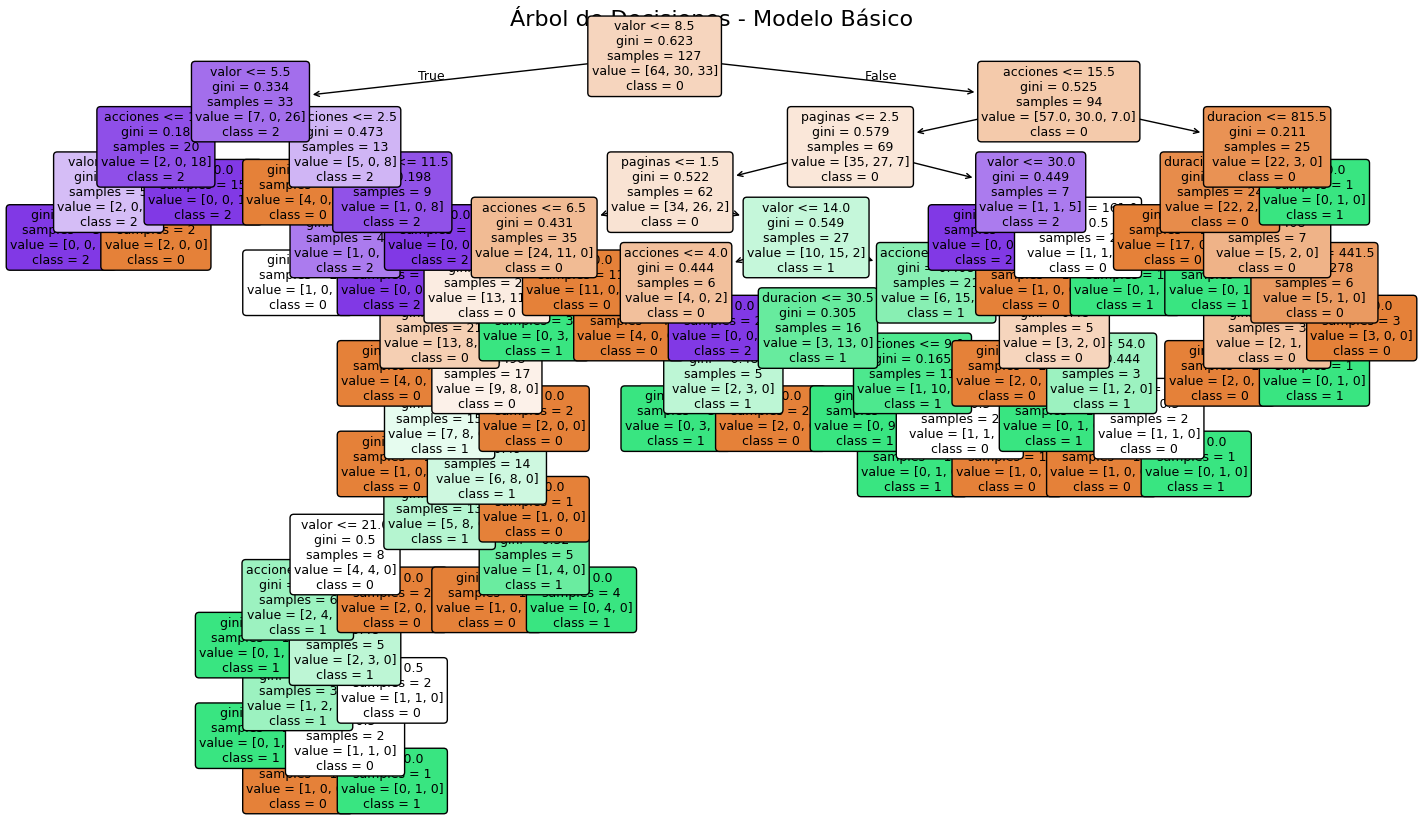

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(
    tree_basic,
    feature_names=X.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Árbol de Decisiones - Modelo Básico", fontsize=16)
plt.show()

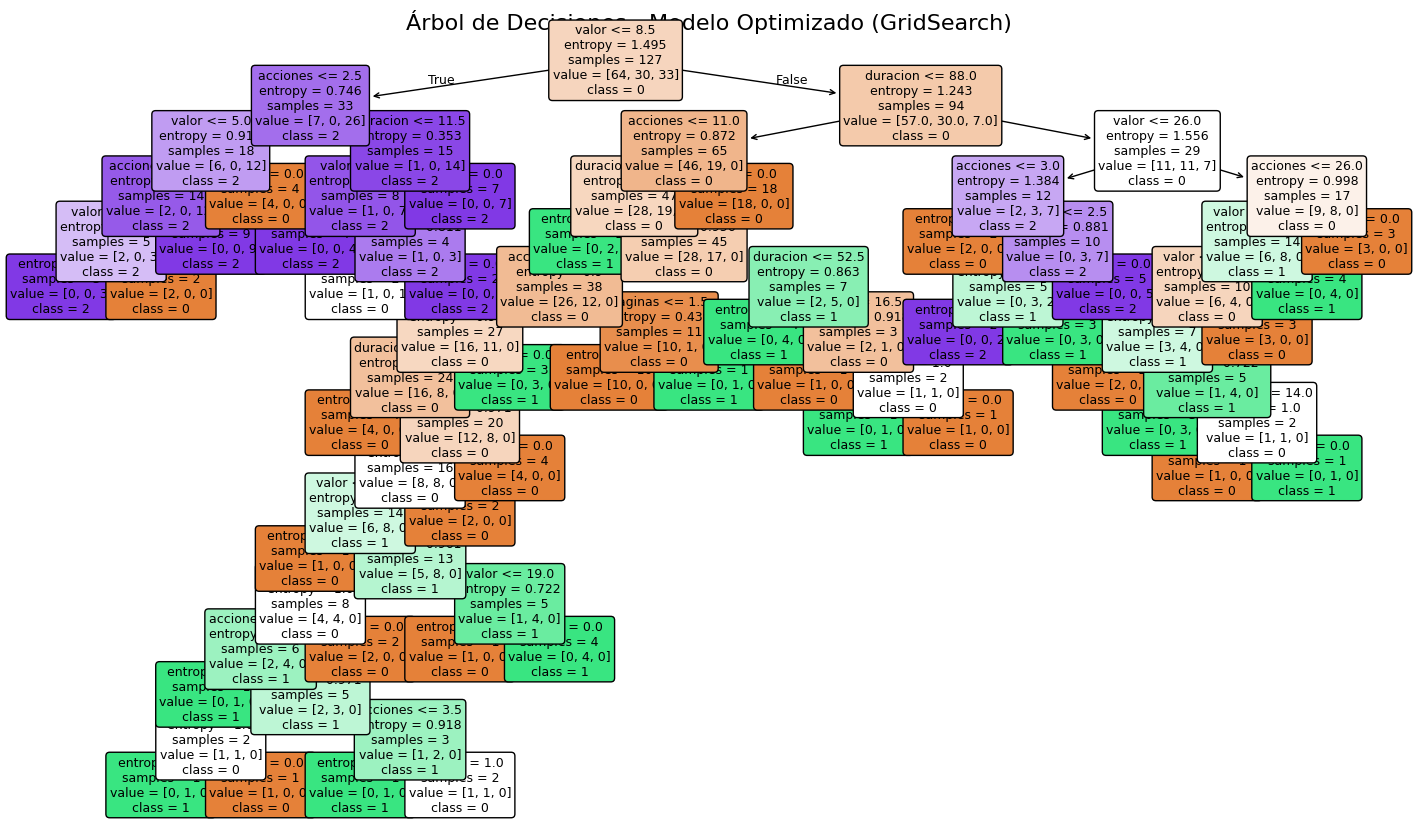

In [ ]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Árbol de Decisiones - Modelo Optimizado (GridSearch)", fontsize=16)
plt.show()